In [84]:
#7*1
import numpy as np
import matplotlib.pyplot as plt
N = 15
nn_exp = np.loadtxt('C:/msys64/home/wangy/experiment-control/matlab_new/analysis/scripts/12_13_22/corr_exp20221209193428.csv',delimiter=',')
data_exp = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_9/expdata20221209103428.csv',delimiter=',')
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_9/Overlap2022_12_09_19_42_53_L15_1',delimiter=',')
z =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_9/z_2022_12_09_19_42_53_L15_1',delimiter=',')
zz =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/12_9/zz_2022_12_09_19_42_53_L15_1',delimiter=',')
nn_expdata = nn_exp.reshape(30,9,15)
zzdata = zz.reshape(len(z),N,N)
data_exp[0,0]=0

In [85]:
data_id = []
for i in data_exp[0,:]:
    Id = np.argmin(abs(data[0]-i))
    data_id.append(Id)
print(data_exp[0,:])    
print(data_id)
print(data[0,data_id])

[0.  1.6 2.6 3.6 4.6 5.6 6.6 7.6 8.6]
[0, 140, 159, 179, 198, 218, 237, 257, 276]
[0.     1.624  2.5968 3.6208 4.5936 5.6176 6.5904 7.6144 8.5872]


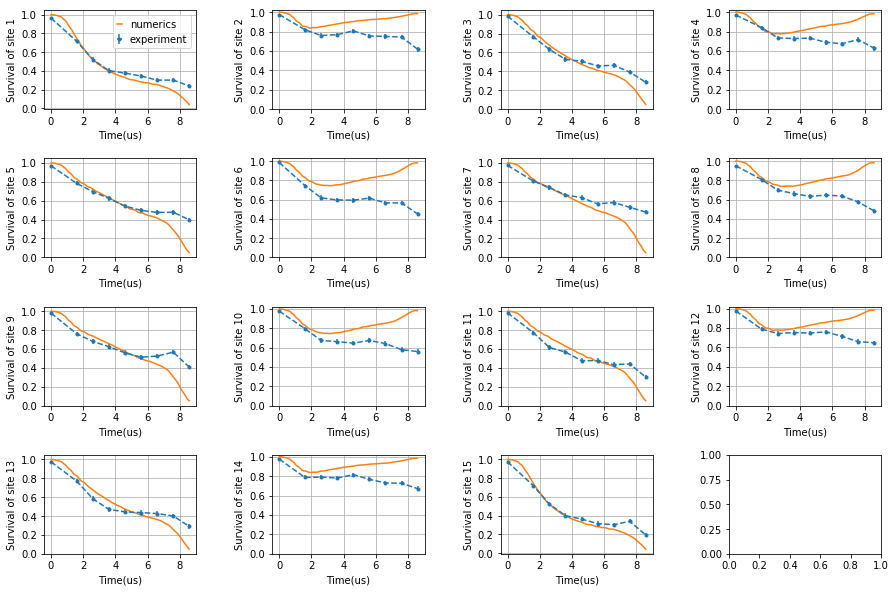

In [86]:


fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2    
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
 #   standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
plt.show()
#print((standard_deviation**0.5)/N)

In [87]:
eta = 0.004;
eps = 0.06;
epsp = 0.04;
def n_c(n):
    corrected_measure_vals = eta * eps + (1 - eta) * (eps * (1 - n) + (1 - epsp + eps * epsp) * n)
    return corrected_measure_vals

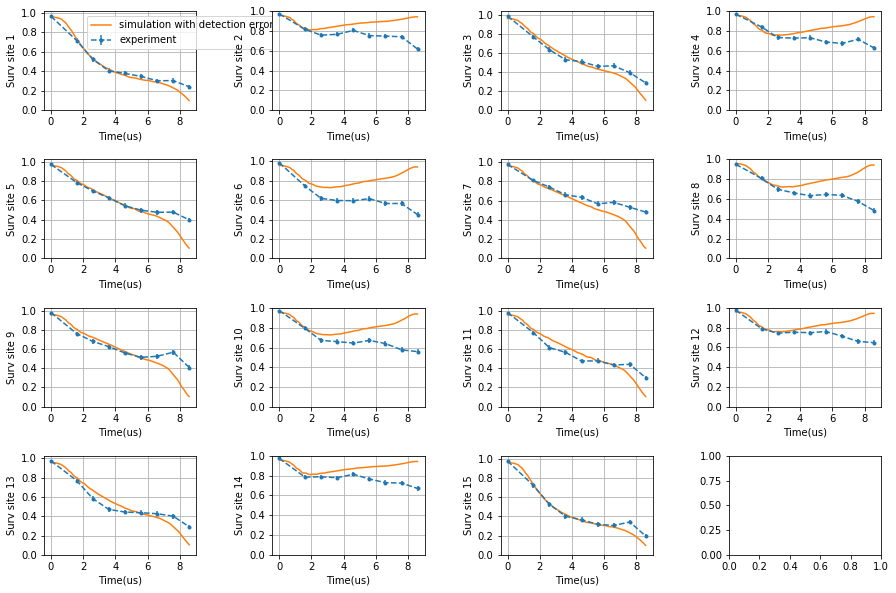

In [89]:
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
for i in range(N):
    n = 1-(z[:,i]+1)/2
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n_c(n),label='simulation with detection error')
    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
  #  standard_deviation +=sum(n_c(n)[data_id]-data_exp[i+1,1:])**2/len(data_id)
    ax[i//4,i%4].grid()

    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Surv site '+ str(i+1))
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
plt.show()
#print((standard_deviation**0.5)/N)

Text(0, 0.5, 'overlap with 1st excited state')

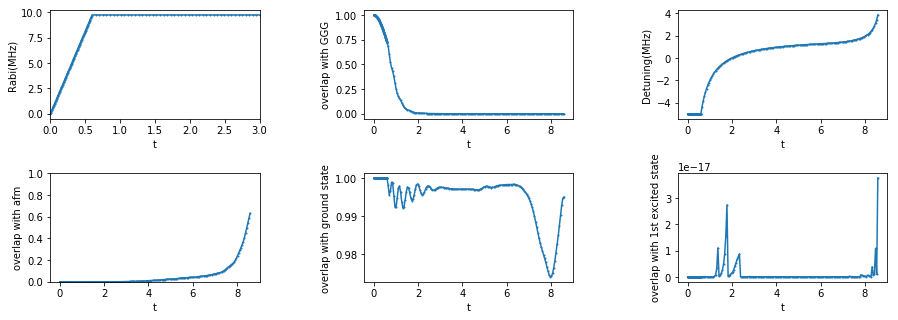

In [90]:
fig, ax = plt.subplots(2, 3, figsize=(15,5))
#fig.suptitle('19 Atoms')
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_xlim([0,3])
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
ax[1,2].set_xlabel('t')
ax[1,2].set_ylabel('overlap with 1st excited state')


In [18]:
print('Overlap with AFM after the ramp: '+ str(data[4][-1]))

Overlap with AFM after the ramp: 0.628975645927041


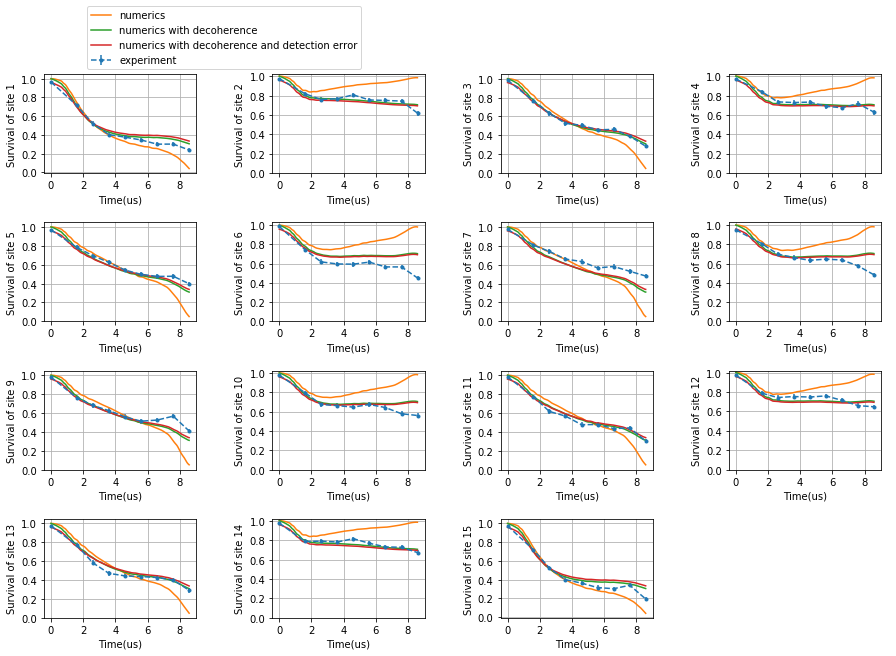

In [91]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
t0 = 10
standard_deviation_with_correction = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2  
    decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')

    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
   # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
ax[-1, -1].axis('off')
plt.show()
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

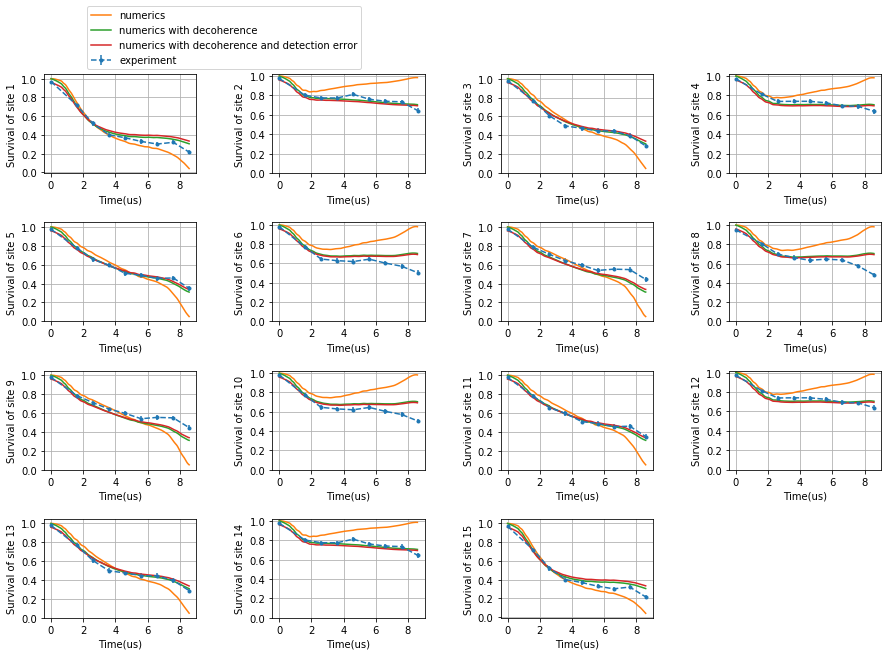

In [92]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
t0 = 10
standard_deviation_with_correction = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2  
    decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end
    ax[i//4,i%4].errorbar(data_exp[0,:],(data_exp[i+1,:]+data_exp[N-i,:])/2,yerr=(data_exp[i+1+N,:]+data_exp[2*N-i,:])/2,ls='--',marker='.',label='experiment')

    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
   # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
ax[-1, -1].axis('off')
plt.show()
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

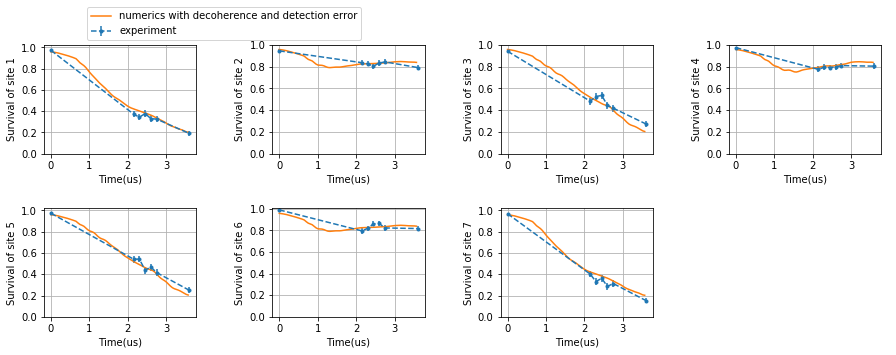

12
uncorrected SD = 0.084342
corrected SD = 0.022896


In [7]:
end = 0.5 
t0list = [12]
for t0 in t0list:
    standard_deviation = 0
    standard_deviation_with_correction = 0
    fig,ax = plt.subplots(ncols = 4 ,nrows=2,figsize=(15,5))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    ax[-1, -1].axis('off')
    for i in range(N):
        n = 1-(z[:,i]+1)/2  
        decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end

        ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    #     ax[i//4,i%4].plot(data[0],n,label='numerics')
    #     ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
        ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

        ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
        standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
        standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

        ax[i//4,i%4].grid()
        ax[i//4,i%4].set_xlabel('Time(us)')
        ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
    ax[0,0].legend(handlelength=0.5)
    ax[0,0].legend(bbox_to_anchor =(0.25, 1))
    plt.savefig('benchmark_7sites_Dilila3us_t012us.pdf')
    plt.show()
    print(t0)
    print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
    print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))
    

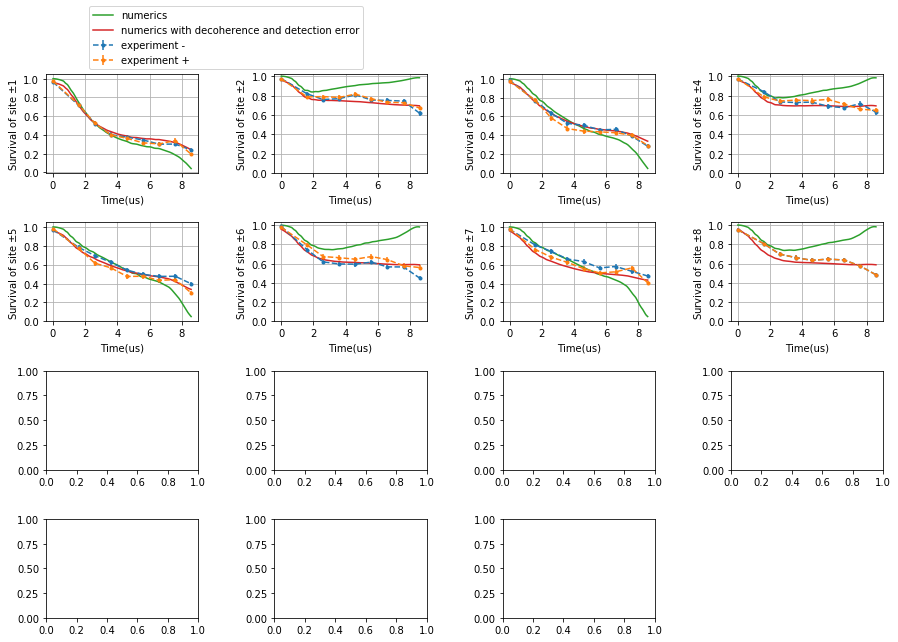

In [207]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
t0 = [20,10,10,10,10,5,5,5,5,5,10,10,10,10,20]

standard_deviation_with_correction = 0

for i in range(int(N/2+0.5)):
    n = 1-(z[:,i]+1)/2  
    decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0[i])+end
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment -')
    ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[N-i,:],yerr=data_exp[2*N-i,:],ls='--',marker='.',label='experiment +')

    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    #ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
   # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site $\pm$'+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
ax[-1, -1].axis('off')
plt.show()
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

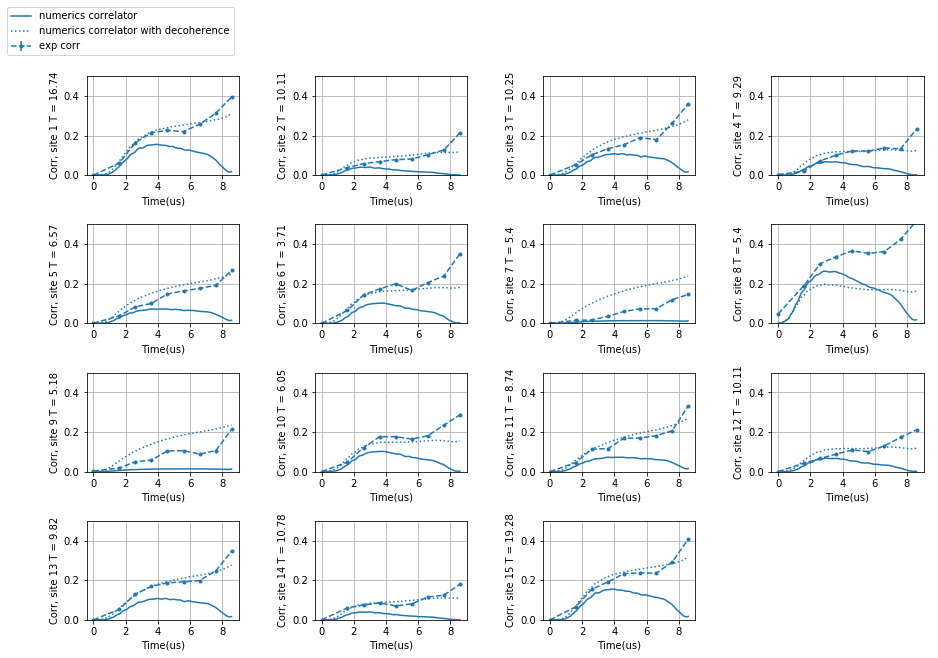

In [250]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
standard_deviation_with_correction = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2  
#     decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end
# looking at the correlator to the jth site, j = 0-14
    j = 7
    # exp
    nn_exp = nn_expdata[j,:,i]
    nn_exp_c = nn_expdata[j,:,i]-(1-data_exp[i+1,:])*(1-data_exp[1+j,:])
    ax[i//4,i%4].errorbar(data_exp[0,:],nn_exp,yerr=nn_expdata[N+j,:,i],ls='--',marker='.',label='exp corr',color = 'C0')
#     ax[i//4,i%4].errorbar(data_exp[0,:],1-data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='exp ryd survival',color = 'C1')
#    ax[i//4,i%4].plot(data_exp[0,:],nn_exp_c,ls='--',marker='.',label='exp connected corr',color = 'C2')    
  #  numerics 
    nn_sim = (zzdata[:,i,j]+z[:,i]+z[:,j]+1)/4
    nn_sim_c = nn_sim- (z[:,i]+1)/2 *(z[:,j]+1)/2
    ax[i//4,i%4].plot(data[0],nn_sim,label='numerics correlator ',color = 'C0')
#    ax[i//4,i%4].plot(data[0],1-n,label='numerics Rydberg population',color = 'C1')
  #  ax[i//4,i%4].plot(data[0],nn_sim_c,label='numerics connected correlator',color = 'C2')
    
    # decoherence 
    dec_zi = z[:,i]*np.exp(-data[0,:]/fitted_t0[i])
    dec_zj = z[:,j]*np.exp(-data[0,:]/fitted_t0[j])
    dec_zz = zzdata[:,i,j]*np.exp(-data[0,:]/fitted_t0[i])*np.exp(-data[0,:]/fitted_t0[j])
    dec_nn_sim = (dec_zz+dec_zi+dec_zj+1)/4
    dec_nn_sim_c = dec_nn_sim- (dec_zi+1)/2 *(dec_zj+1)/2

    ax[i//4,i%4].plot(data[0],dec_nn_sim,label='numerics correlator with decoherence',ls = 'dotted',color = 'C0')
    #ax[i//4,i%4].plot(data[0],(1+dec_zi)/2,label='numerics Rydberg population with decoherence',color = 'C1')
   #ax[i//4,i%4].plot(data[0],dec_nn_sim_c,label='numerics connected correlator with decoherence',ls = 'dotted',color = 'C2')
    
    
#    ax[i//4,i%4].errorbar(data_exp[0,:],nn_exp[i+1,:],yerr=data_exp[2*N-i,:],ls='--',marker='.',label='experiment +')
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    #ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
#    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    #ax[i//4,i%4].set_yticks([-1,0,1])
    ax[i//4,i%4].set_ylim(0,0.5)
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
   # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Corr, site '+ str(i+1)+' T = '+str(round(fitted_t0[i],2)))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
ax[-1, -1].axis('off')
plt.show()
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

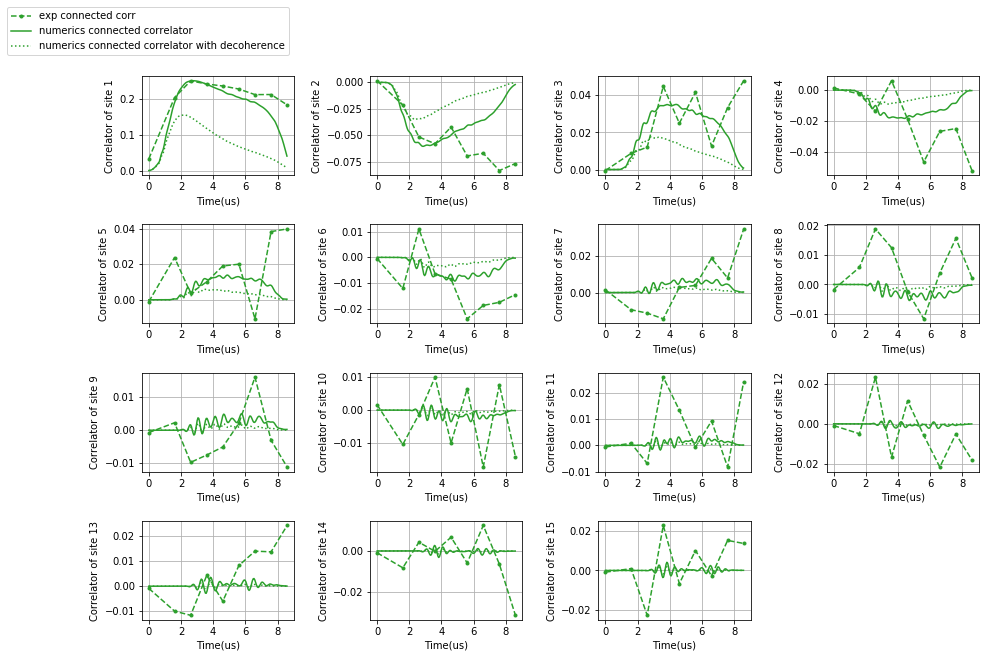

In [190]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
t0 = 10
standard_deviation_with_correction = 0

for i in range(N):
    n = 1-(z[:,i]+1)/2  
#     decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0)+end
# looking at the correlator to the jth site, j = 0-14
    j = 0
    # exp
    nn_exp = nn_expdata[j,:,i]
    nn_exp_c = nn_expdata[j,:,i]-(1-data_exp[i+1,:])*(1-data_exp[1+j,:])
#    ax[i//4,i%4].errorbar(data_exp[0,:],nn_exp,yerr=nn_expdata[N+j,:,i],ls='--',marker='.',label='exp corr',color = 'C0')
#     ax[i//4,i%4].errorbar(data_exp[0,:],1-data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='exp ryd survival',color = 'C1')
    ax[i//4,i%4].plot(data_exp[0,:],nn_exp_c,ls='--',marker='.',label='exp connected corr',color = 'C2')    
  #  numerics 
    nn_sim = (zzdata[:,i,j]+z[:,i]+z[:,j]+1)/4
    nn_sim_c = nn_sim- (z[:,i]+1)/2 *(z[:,j]+1)/2
  #  ax[i//4,i%4].plot(data[0],nn_sim,label='numerics correlator ',color = 'C0')
#    ax[i//4,i%4].plot(data[0],1-n,label='numerics Rydberg population',color = 'C1')
    ax[i//4,i%4].plot(data[0],nn_sim_c,label='numerics connected correlator',color = 'C2')
    
    # decoherence 
    dec_zi = z[:,i]*np.exp(-data[0,:]/t0)
    dec_zj = z[:,j]*np.exp(-data[0,:]/t0)
    dec_zz = zzdata[:,i,j]*np.exp(-2*data[0,:]/t0)
    dec_nn_sim = (dec_zz+dec_zi+dec_zj+1)/4
    dec_nn_sim_c = dec_nn_sim- (dec_zi+1)/2 *(dec_zj+1)/2

    #ax[i//4,i%4].plot(data[0],dec_nn_sim,label='numerics correlator with decoherence',ls = 'dotted',color = 'C0')
    #ax[i//4,i%4].plot(data[0],(1+dec_zi)/2,label='numerics Rydberg population with decoherence',color = 'C1')
    ax[i//4,i%4].plot(data[0],dec_nn_sim_c,label='numerics connected correlator with decoherence',ls = 'dotted',color = 'C2')
    
    
#    ax[i//4,i%4].errorbar(data_exp[0,:],nn_exp[i+1,:],yerr=data_exp[2*N-i,:],ls='--',marker='.',label='experiment +')
    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    #ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
#    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    #ax[i//4,i%4].set_yticks([-1,0,1])
    #ax[i//4,i%4].set_ylim(0,0.5)
    #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
   # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Correlator of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(1, 1.75))
ax[-1, -1].axis('off')
plt.show()
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

In [223]:
data_id = []
for i in data_exp[0,:]:
    Id = np.argmin(abs(data[0]-i))
    data_id.append(Id)
print(data_exp[0,:])    
print(data_id)
print(data[0,data_id])

[0.  1.6 2.6 3.6 4.6 5.6 6.6 7.6 8.6]
[0, 140, 159, 179, 198, 218, 237, 257, 276]
[0.     1.624  2.5968 3.6208 4.5936 5.6176 6.5904 7.6144 8.5872]


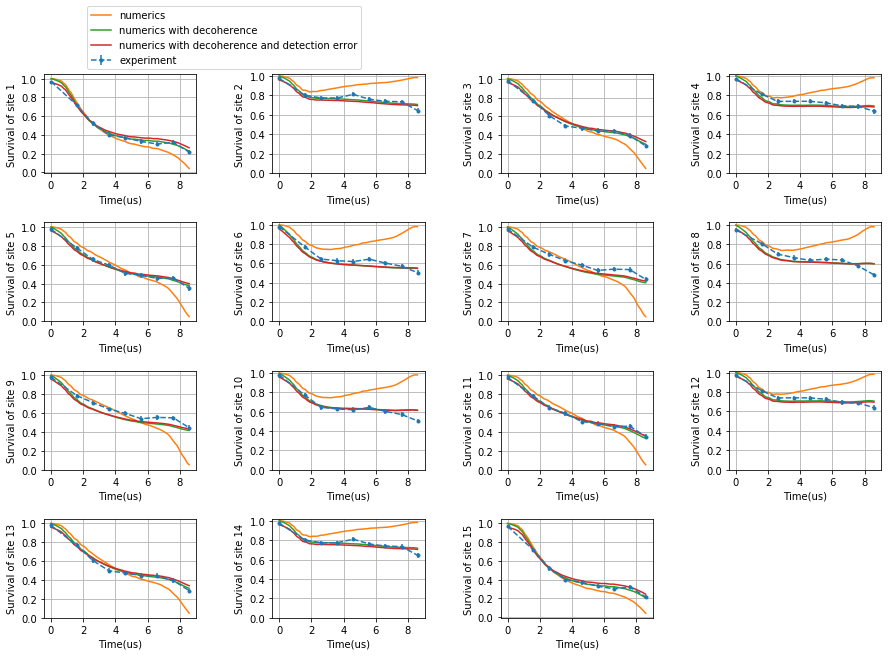

[16.735735735735737, 10.105105105105105, 10.24924924924925, 9.288288288288289, 6.573573573573573, 3.714714714714715, 5.396396396396397, 5.396396396396397, 5.18018018018018, 6.045045045045045, 8.735735735735735, 10.105105105105105, 9.816816816816816, 10.777777777777779, 19.28228228228228]


In [249]:
#corrected for the decoherence 
fig,ax = plt.subplots(ncols = 4 ,nrows=4,figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
standard_deviation = 0
end = 0.5 
standard_deviation_with_correction = 0
fitted_t0 = []
for i in range(N):
    deviation = []
    n = 1-(z[data_id,i]+1)/2     
    t0 = np.linspace(1,25,1000)
    decayed_n = []
    for t0j in t0:
        temp = (n[:]-end)*np.exp(-data[0,data_id]/t0j)+end
        decayed_n.append(temp)
        deviation.append(np.linalg.norm(temp-data_exp[i+1,:]))
    deviation = np.array(deviation)    
    t0_id = np.argmin(abs(deviation))
    t0_i = t0[t0_id]
    fitted_t0.append(t0_i)
    n = 1-(z[:,i]+1)/2  
    decayed_n = (n[:]-end)*np.exp(-data[0,:]/t0_i)+end
    
    
    
    
    
    ax[i//4,i%4].errorbar(data_exp[0,:],(data_exp[i+1,:]+data_exp[N-i,:])/2,yerr=(data_exp[i+1+N,:]+data_exp[2*N-i,:])/2,ls='--',marker='.',label='experiment')

    #ax[i//4,i%4].errorbar(data_exp[0,:],data_exp[i+1,:],yerr=data_exp[i+1+N,:],ls='--',marker='.',label='experiment')
    ax[i//4,i%4].plot(data[0],n,label='numerics')
    ax[i//4,i%4].plot(data[0],decayed_n,label='numerics with decoherence')
    ax[i//4,i%4].plot(data[0],n_c(decayed_n),label='numerics with decoherence and detection error')

    ax[i//4,i%4].set_yticks([0,0.2,0.4,0.6,0.8,1])
#     #standard_deviation +=sum(n[data_id]-data_exp[i+1,1:])**2/len(data_id)
#    # standard_deviation_with_correction += sum((n_c(decayed_n))[data_id]-data_exp[i+1,1:])**2/len(data_id)

    ax[i//4,i%4].grid()
    ax[i//4,i%4].set_xlabel('Time(us)')
    ax[i//4,i%4].set_ylabel('Survival of site '+ str(i+1))
ax[0,0].legend(handlelength=0.5)
ax[0,0].legend(bbox_to_anchor =(0.25, 1))
ax[-1, -1].axis('off')
plt.show()
print(fitted_t0)
# print('uncorrected SD = %3f' % (standard_deviation**0.5/N))
# print('corrected SD = %3f'% (standard_deviation_with_correction**0.5/N))

array([ 5.        ,  5.34482759,  5.68965517,  6.03448276,  6.37931034,
        6.72413793,  7.06896552,  7.4137931 ,  7.75862069,  8.10344828,
        8.44827586,  8.79310345,  9.13793103,  9.48275862,  9.82758621,
       10.17241379, 10.51724138, 10.86206897, 11.20689655, 11.55172414,
       11.89655172, 12.24137931, 12.5862069 , 12.93103448, 13.27586207,
       13.62068966, 13.96551724, 14.31034483, 14.65517241, 15.        ])